In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [4]:
df = pd.read_csv('/Users/shammi/Downloads/amz_uk_price_prediction_dataset 2.csv')

In [5]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [6]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [7]:
#Part 1: Analyzing Best-Seller Trends Across Product Categories


'''Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order
'''

'Objective: Understand the relationship between product categories and their best-seller status.\n\nCrosstab Analysis:\n\nCreate a crosstab between the product category and the isBestSeller status.\n\nAre there categories where being a best-seller is more prevalent?\n\nHint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order\n'

In [8]:
#crosstab 

# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [9]:
#best-sellers for each category
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])


# Sorting categories 
sorted_crosstab = crosstab_result.sort_values(by=True, ascending=False)

print(sorted_crosstab)


isBestSeller                  False  True 
category                                  
Grocery                        9008    556
Health & Personal Care         9017    552
Baby                          14709    341
Sports & Outdoors            835935    330
Power & Hand Tools             8353    306
...                             ...    ...
Downhill Ski Boots             1284      0
Digital Frames                  774      0
Motorbike Chassis               107      0
Motorbike Drive & Gears         250      0
eBook Readers & Accessories     246      0

[296 rows x 2 columns]


In [10]:
#2 Statistical Tests:

'''Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.'''


"Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.\nCompute Cramér's V to understand the strength of association between best-seller status and category."

In [11]:
#Chi-square test

from scipy.stats import chi2_contingency


chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [12]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
cramers_v = association(crosstab_result, method="cramer")
print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.1222829439760564


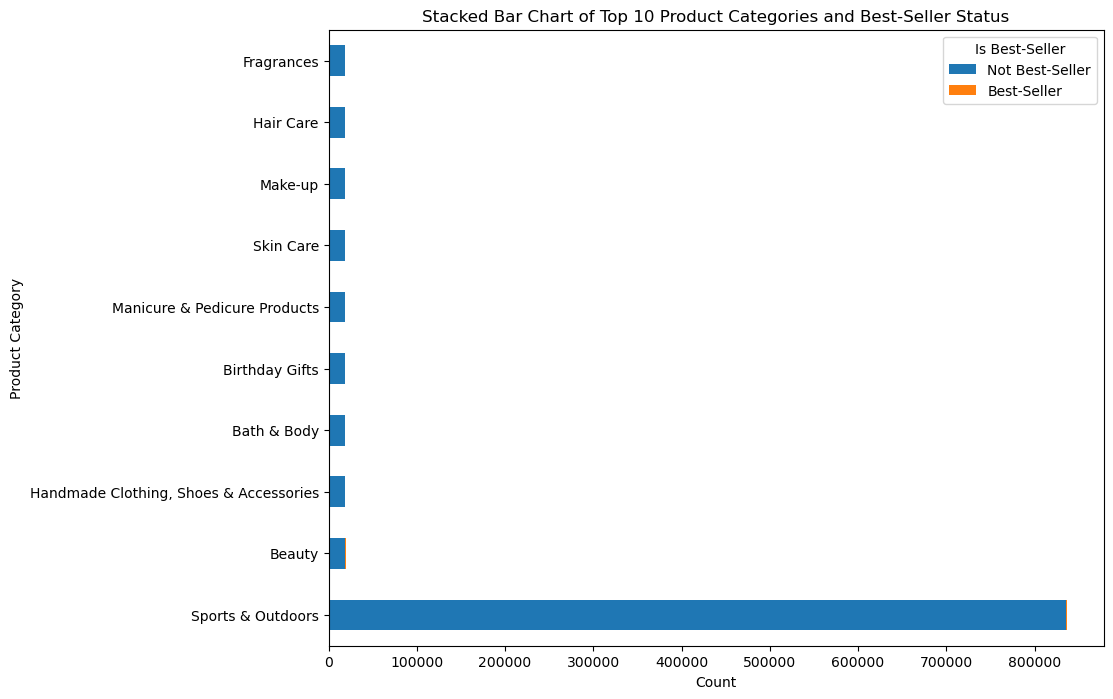

In [13]:
#visualization a stacked bar chart.



# Calculate total counts for each category to filter for the top categories
crosstab_result['Total'] = crosstab_result.sum(axis=1)

# Sort categories by total count and filter for the top N categories
top_categories = crosstab_result.sort_values(by='Total', ascending=False).head(10)

# Drop the Total column before plotting, as it's no longer needed in the visual
top_categories = top_categories.drop(columns='Total')

# Plotting a horizontal stacked bar chart for top categories
plt.figure(figsize=(10, 8))  
top_categories.plot(kind='barh', stacked=True, ax=plt.gca())

# Adding titles and labels
plt.title('Stacked Bar Chart of Top 10 Product Categories and Best-Seller Status')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.legend(title='Is Best-Seller', labels=['Not Best-Seller', 'Best-Seller'])



In [14]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands


In [15]:
#IQR Method #filtering

# Calculate Q1 and Q3
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outliers as prices that are below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original DataFrame had {df.shape[0]} rows.")
print(f"DataFrame without outliers has {filtered_df.shape[0]} rows.")



Original DataFrame had 2443651 rows.
DataFrame without outliers has 2115963 rows.


Text(0, 0.5, 'Price')

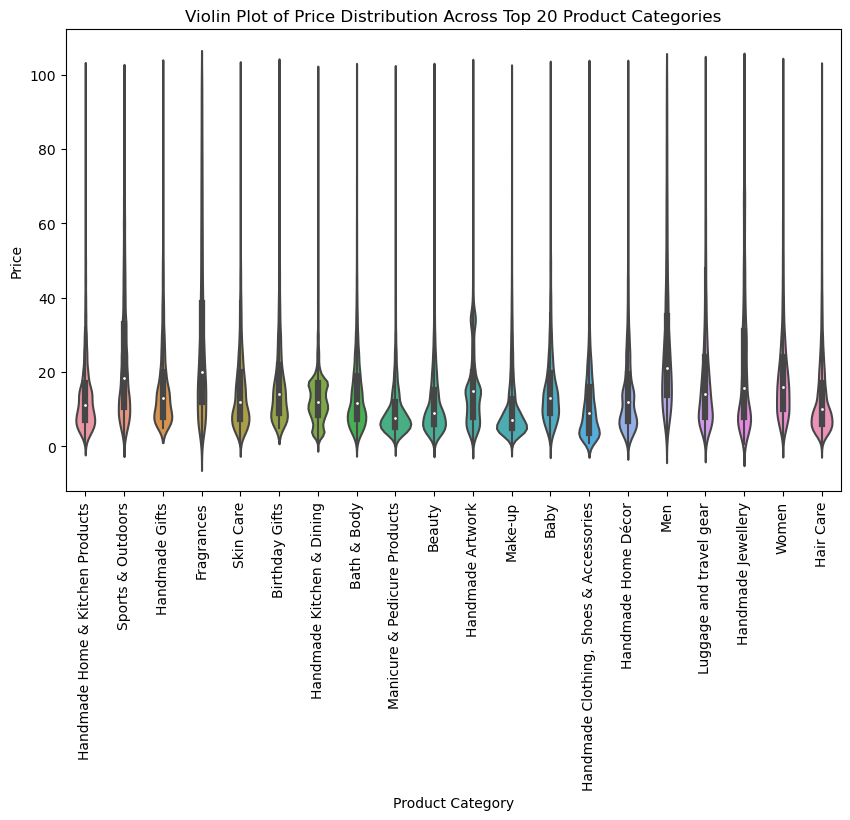

In [16]:
# Violin Plots


# Step 1: Calculate the top 20 categories by count
top_categories = filtered_df['category'].value_counts().nlargest(20).index

# Step 2: Filter the DataFrame to include only these categories
new_df = filtered_df[filtered_df['category'].isin(top_categories)]

# Step 3: Create the violin plot

plt.figure(figsize=(10, 6)) 
sns.violinplot(x='category', y='price', data=new_df)


plt.xticks(rotation=90)  
plt.title('Violin Plot of Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')




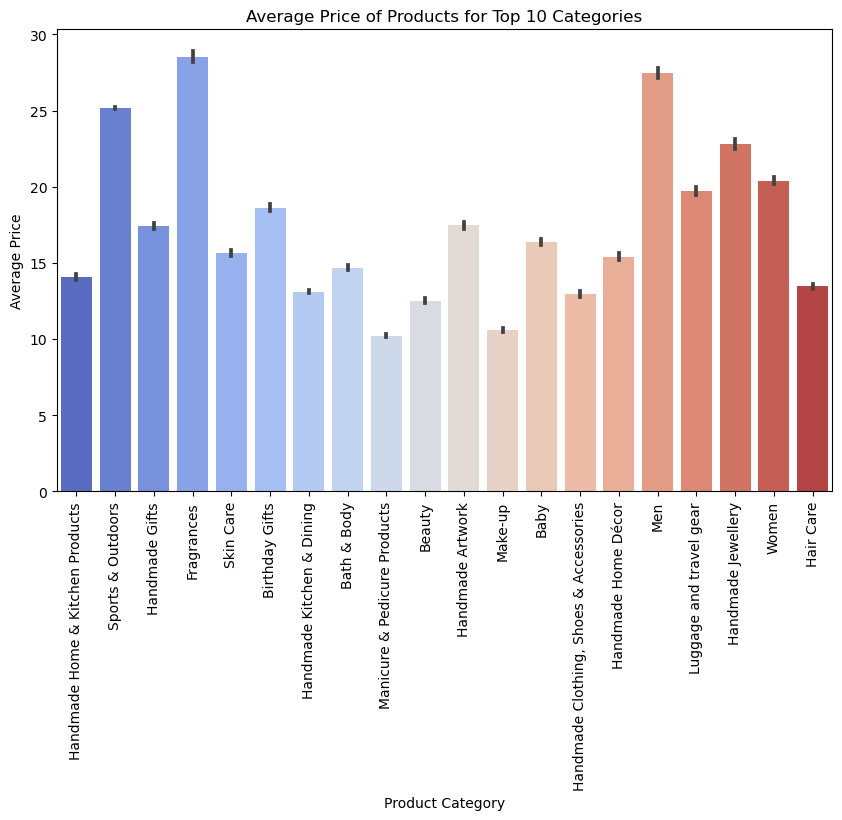

In [24]:
# bar charts
#comparing the average price of products for the top 10 


# Step 1: Calculate the top 10 categories by count
top_categories = new_df['category'].value_counts().nlargest(10).index

# Step 2: Filter the DataFrame to include only these categories
top_categories_df = new_df[new_df['category'].isin(top_categories)]

# Compute the average price for each of these categories
average_prices = top_categories_df.groupby('category')['price'].mean().sort_values(ascending=False)

# Step 3: Create the bar chart
plt.figure(figsize=(10, 6)) 

sns.barplot(data=new_df, x='category', y='price', palette="coolwarm")

# Adding titles and labels
plt.title('Average Price of Products for Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  


plt.show()


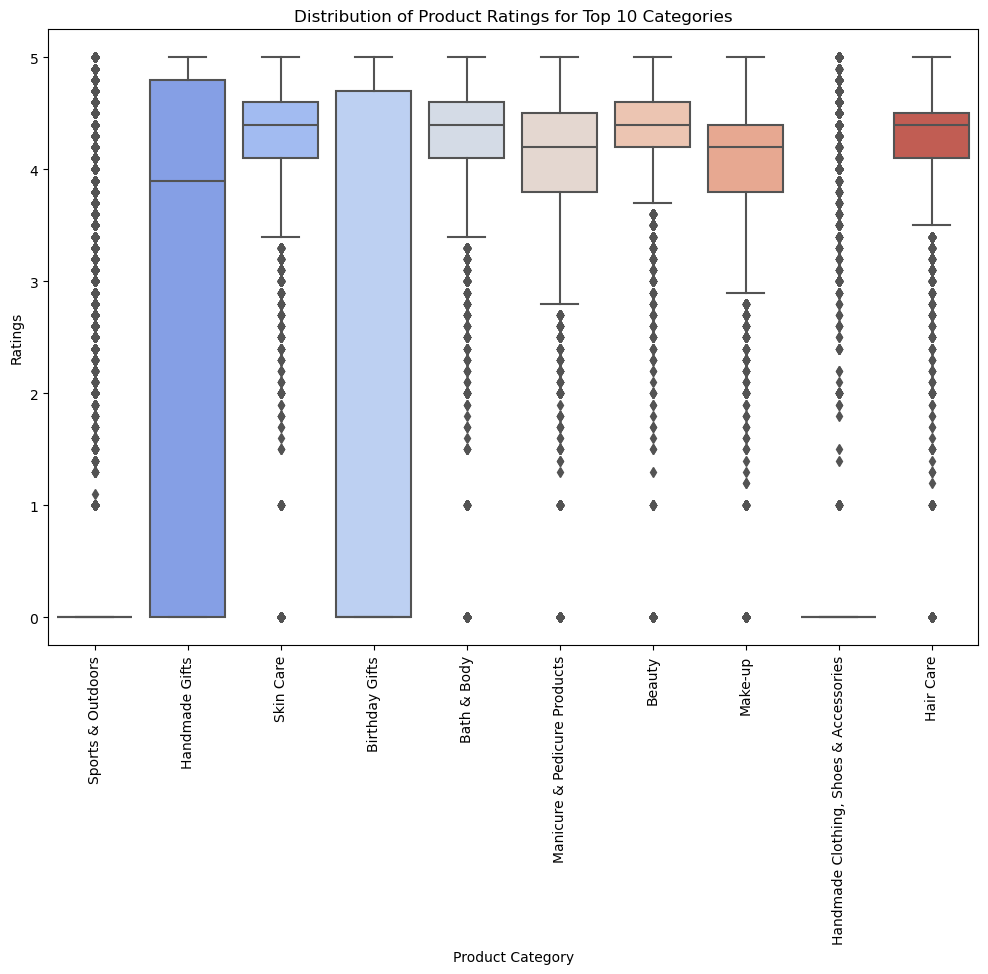

In [18]:
#side-by-side box plots


# Fix the reference to the 'category' column by adding quotes
top_10_categories = new_df['category'].value_counts().nlargest(10).index

# Use the filtered DataFrame based on the top 10 categories
top_10_categories_df = new_df[new_df['category'].isin(top_10_categories)]

# Create a boxplot using the filtered DataFrame
plt.figure(figsize=(12, 8))  # Optionally adjust the figure size
sns.boxplot(data=top_10_categories_df, x='category', y='stars', palette="coolwarm")

# Adding titles and labels
plt.title('Distribution of Product Ratings for Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.xticks(rotation=90)  

# Show the plot
plt.show()


In [19]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings



In [20]:
#Correlation Coefficients:

# Calculate  correlation 'price' and 'stars'
correlation = new_df['price'].corr(df['stars'])

correlation


-0.01806860387847252

In [41]:
correlation_2 = new_df['price'].corr(new_df['stars'], method='spearman')

correlation_2

-0.016882566241840896

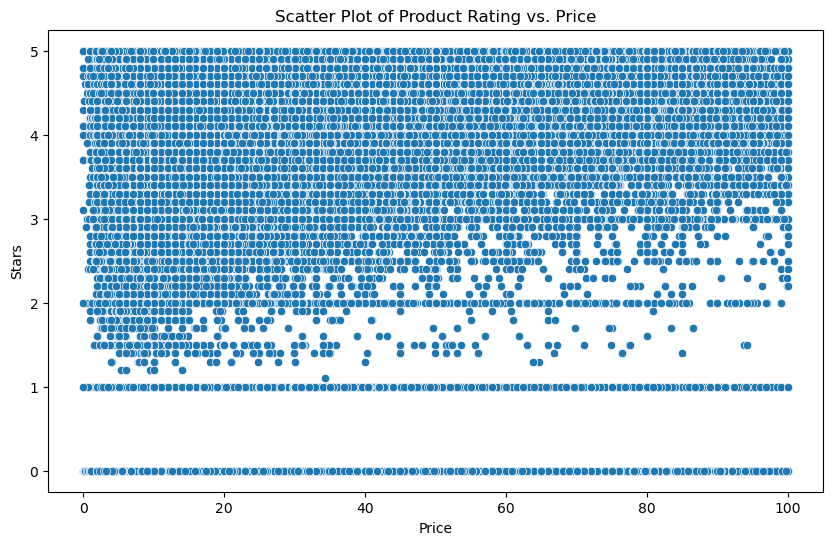

In [39]:
#scatter plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=new_df)
plt.title('Scatter Plot of Product Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.show()


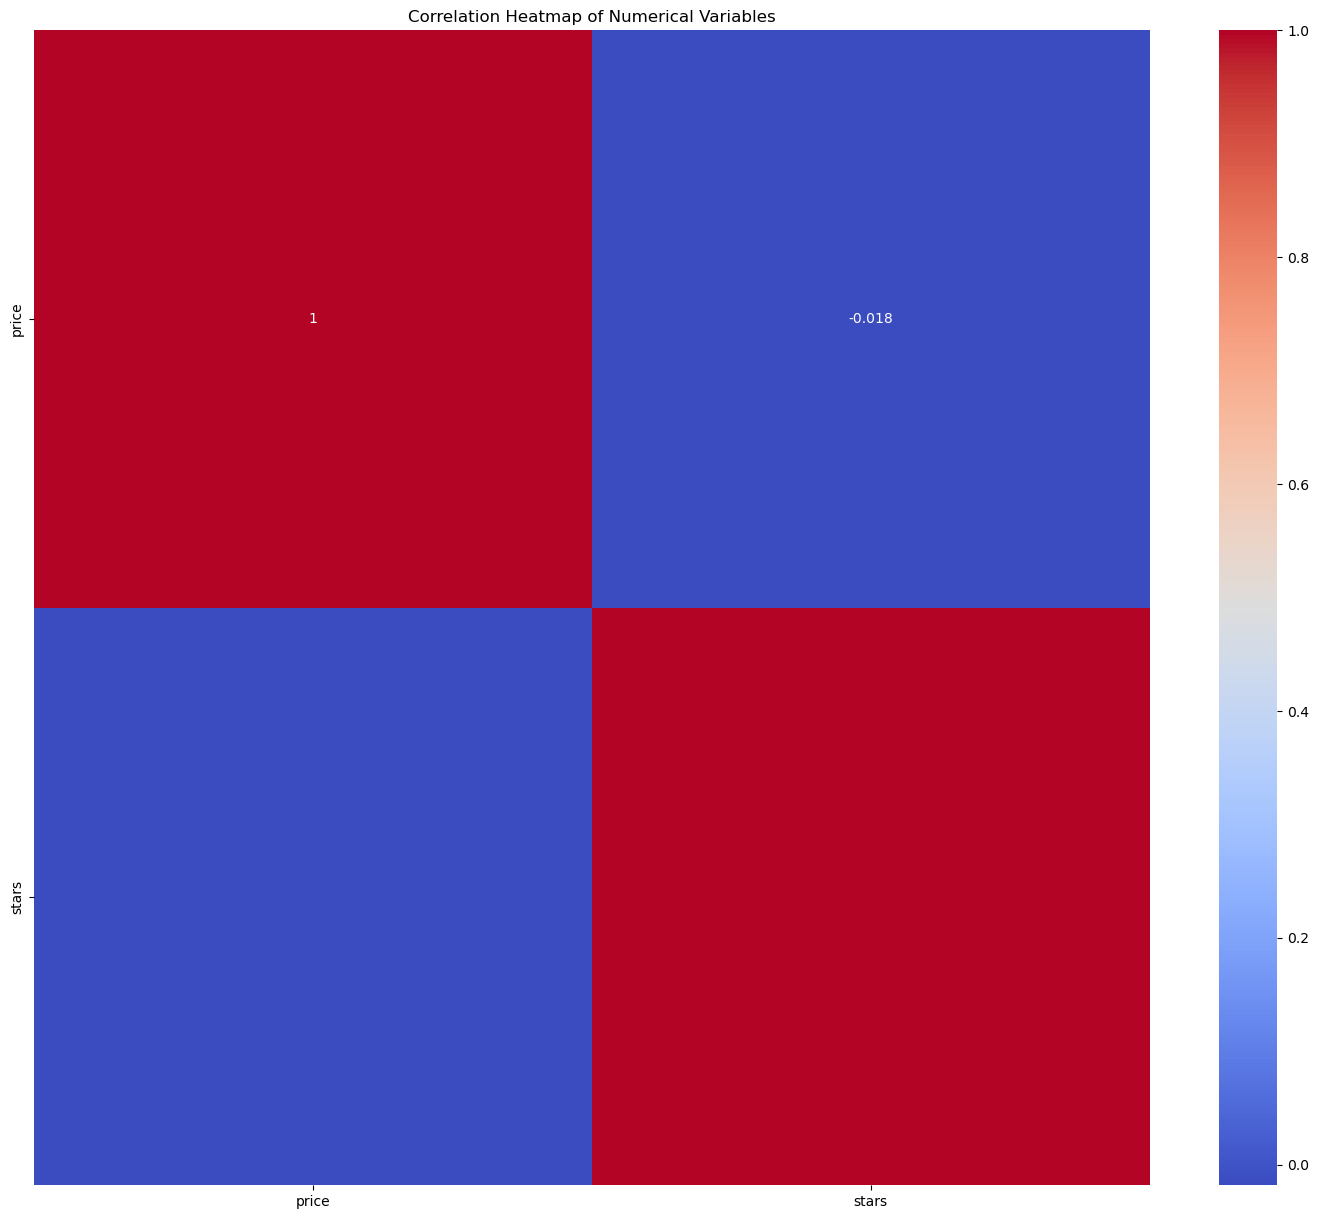

In [43]:
#Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(new_df[['price', 'stars']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()